# Final Project

# Schrödinger Equation in Marix Form

## Introduction

Schrödinger's wave equation describes the form of the probability waves that determine the motion of small particles and how they are affected by external influences. It is used to find the allowed energy levels of a quantum system and assumed to explain the behaviour of atomic particles. The wavefunctions associated to these energy levels gives the probability of finding a particle in a specific position in space

The solution to Schrödinger's wave equation for a specific quantum system is based on a method finding the eigenvalues and eigenvectors developed by Fourier. The mathematical function (in this case $\phi$, where $\phi_{n}$ = $(x^{n})(x-1)(x+1))$ is expressed as the sum of an infinite series of periodic functions. The desired solution is obtained when the functions are at the correct amplitude superposition is achieved when they are added together. The solution (the wave function of that specific quantum system) was replaced by the wave functions of the individual series, which were natural harmonics of each other.

This report explores  the solutions to Schrödinger's wave equation in matrix form. By solving a generalised eigenvalue problem, the solution to Schrödinger's equation will be obtained for the quantum system chosen. The quantum system explored in this report is the infinite potential well in the region  -1 < x < 1  using the basis function  $\phi_{n} (x)$ = $(x^{n})(x-1)(x+1)$  where n = 0, 1, 2, ..., N. The answers collected for different basis sizes N will then be compared to known exact results. Integrating for the Hamiltonian matrix and S matrix gives a series of linear solutions that can be represented by the following matrix equation:

(Matrix Equation) :  Ha = ESa   [1]


(Integral 1) :  $H_{ij}$ = $\int^{∞}_{-∞}$ $\phi^{*}_{i}$ $\hat{H} $ $\phi_{j} $ dx   [1]

(Integral 2) :  $S_{ij}$ = $\int^{∞}_{-∞}$ $\phi^{*}_{i}$ $\phi_{j} $ dx   [1]


With a basis set of N functions $\phi_{i} (x)$, the linear combinations of them (where $\phi (x)$ = $\sum_{i} c_{i} \phi_{i} (x)$ ) that solve the time-independent Schrödinger equation (TISE) in one dimension are to be found.



## Infinite Square Well

In [888]:
import numpy as np
from scipy.linalg import eig                                                                                                                 # for i in range(n):
import matplotlib.pyplot as plt                                                                                                                                             #     plt.plot(eigenvectors)
from sympy import Symbol

In [889]:
x = Symbol('x')                                           # makes 'x' a symbol so phi can be differentiated with respect to x later on
phi =(x**i)*(x-1)*(x+1)                                   # phi labelled as y =(x**i)*(x-1)*(x+1) 

phiprime = phi.diff(x)                                    # differentiates phi with respect to 'x' using an inbuilt function
phi2prime = phiprime.diff(x)                              # differentiates the first derivative of phi with respect to 'x' using an inbuilt function

print('First differential of phi:',phiprime)                   # prints first differential of phi (giving x**5*(x - 1) + x**5*(x + 1) + 5*x**4*(x - 1)*(x + 1))
print('Second differential of phi:',phi2prime)                 # prints second differential of phi (giving 2*x**5 + 10*x**4*(x - 1) + 10*x**4*(x + 1) + 20*x**3*(x - 1)*(x + 1))

First differential of phi: x**4*(x - 1) + x**4*(x + 1) + 4*x**3*(x - 1)*(x + 1)
Second differential of phi: 2*x**4 + 8*x**3*(x - 1) + 8*x**3*(x + 1) + 12*x**2*(x - 1)*(x + 1)


In [890]:
n = 6                                    # Basis function of N function, where N can be chosen/chanegd

def basis_fn(x1,x2,dx):
    """defines a function basis_fn with 3 arguments; x1, x2 and dx"""
    
    x = np.arange(x1,x2,dx)                          # range of x values starting from x1, ending at x2 with an interval of dx
    phi = []                                         # makes a list for the values of phi
    phi_differentials_2 = []                         # makes a list for the second differentials of phi
    
    for i in range(n):                               # for loop, looping over a range n
        phi_i = (x**i)*(x-1)*(x+1)                         # phi function taken from above
        phi.append(phi_i)                            # appends values of phi to list above
        phi_diff1 = np.gradient(phi_i, x)
        phi_diff2= (2 + i)*( 1 + i ) * x**i -i*(i-1)*x**(i-2)   # second differential of phi function derived from code above
        phi_differentials_2.append(phi_diff2)                            # appends values of the second differentials of phi to list above
    
    return(phi,phi_differentials_2)                              # function returns values of phi and the second differentials of phi

phi,phi_differentials_2 = basis_fn(-1,1,10e-3)


In [891]:
def S_matrix(basis_fn):
    """defines a function S_matrix with the argument basis_functions"""
    
    S = np.zeros((n,n))                         # forms a zero matrix of dimensions n x n
    
    for i in range(n):
        for j in range(n):
            integral = np.trapz(np.conjugate(phi[i])*phi[j])
            S[i,j] = integral
    return S

In [892]:
S_phi=S_matrix(phi)

In [893]:
def H_matrix(basis_fn, differentials_2):
    """defines a function H_matrix with 2 arguments; basis_fn and differentials_2"""
    
    H_phi=np.zeros((n,n))                          # forms a zero matrix of dimensions n x n

    for i in range(n):        
        for j in range(n):
            integral = np.trapz(np.conjugate( phi[i] )*(-phi_differentials_2[j]) )         # calculating integrals for the Hamiltonian matrix
            H_phi[i,j] = integral
            
    return H_phi      # returns values of H_phi for the function H_matrix

In [894]:
H_phi = H_matrix(phi, phi_differentials_2)

In [895]:
eigenvalues, eigenvectors = eig(H_phi,S_phi)  # calculates eigenvalues and eigenvectors of the Hamiltonian matrix and the S matrix

In [896]:
eigenvectors  #prints eigenvectors

array([[ -1.20536534e-04,   2.10573196e-02,  -9.73654639e-01,
         -8.86634498e-02,   4.45926426e-05,  -1.40733553e-06],
       [  6.69327943e-02,   1.80771857e-03,  -5.29912314e-07,
          8.31004273e-05,   1.74908397e-01,   8.39020210e-01],
       [  2.61292764e-03,  -4.44158801e-01,   2.27279107e-01,
          8.28324587e-01,  -7.88390751e-04,  -5.57319662e-06],
       [ -5.69371059e-01,  -1.46957641e-02,   2.22173035e-06,
          3.09066024e-04,  -8.09940740e-01,  -5.31952575e-01],
       [ -5.45187578e-03,   8.95352049e-01,  -1.84621735e-02,
         -5.53187286e-01,   1.34810691e-03,   2.90788999e-05],
       [  8.19329014e-01,   2.01251919e-02,  -3.67160390e-06,
         -9.46537962e-04,   5.59821945e-01,   1.14330857e-01]])

In [897]:
idx = eigenvalues.argsort()                                 # sorts eigenvalues    
eigenvalues = eigenvalues[idx]              
eigenvectors = eigenvectors[:,idx]

eigenvalues = np.array(eigenvalues)                           # puts values for eigenvalues into an array
eigenvectors = np.array(eigenvectors)                         # puts values for eigenvectors into an array

print(eigenvalues.real)         # prints eigenvalues for a basis function of n=1 to n=6
#print(eigenvectors)
#print(idx)

[   2.46740044    9.86954784   22.29843905   40.01688824   87.1824831
  141.09707994]


In [898]:
def energy_state(basis_fn, Energy_level):
    """defines a function energy_state with 2 arguments; basis_fn and Energy_level"""
    
    y = np.zeros(len(x))
    
    for i in range(len(basis_fn)):        

        y = np.add(y,eigenvectors[i,Energy_level]* basis_fn[i])  # adds a factor of eigenvectors[i,Energy_level]* basis_fn[i] every iteration
        
    plt.figure()
    plt.plot(x,y)
    plt.xlabel("L")
    plt.ylabel("Ψ")
    plt.suptitle("Wave Functions For Infinite Square Well")
    plt.legend()
    plt.grid()

<IPython.core.display.Javascript object>


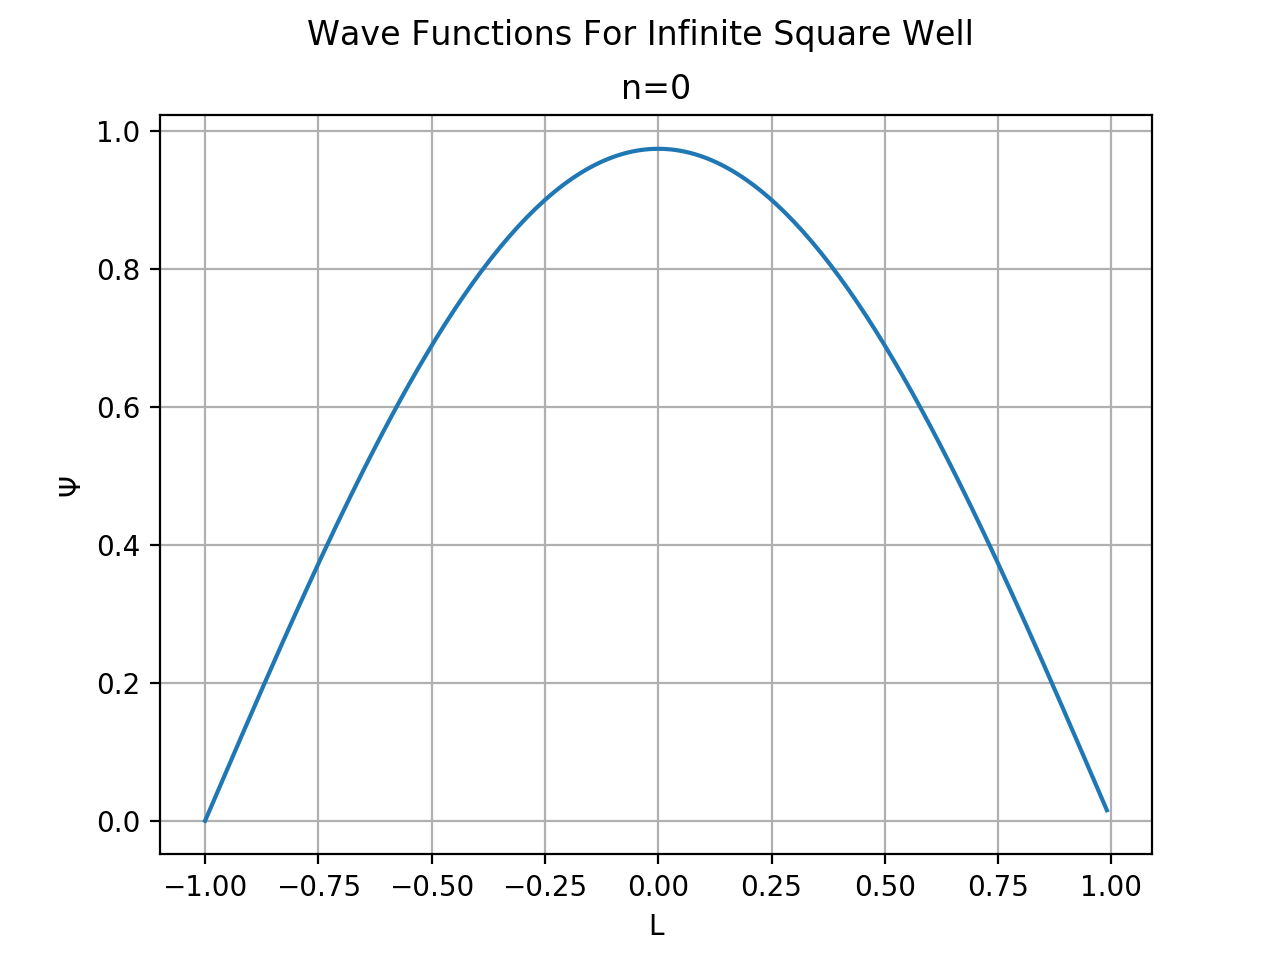

<IPython.core.display.Javascript object>


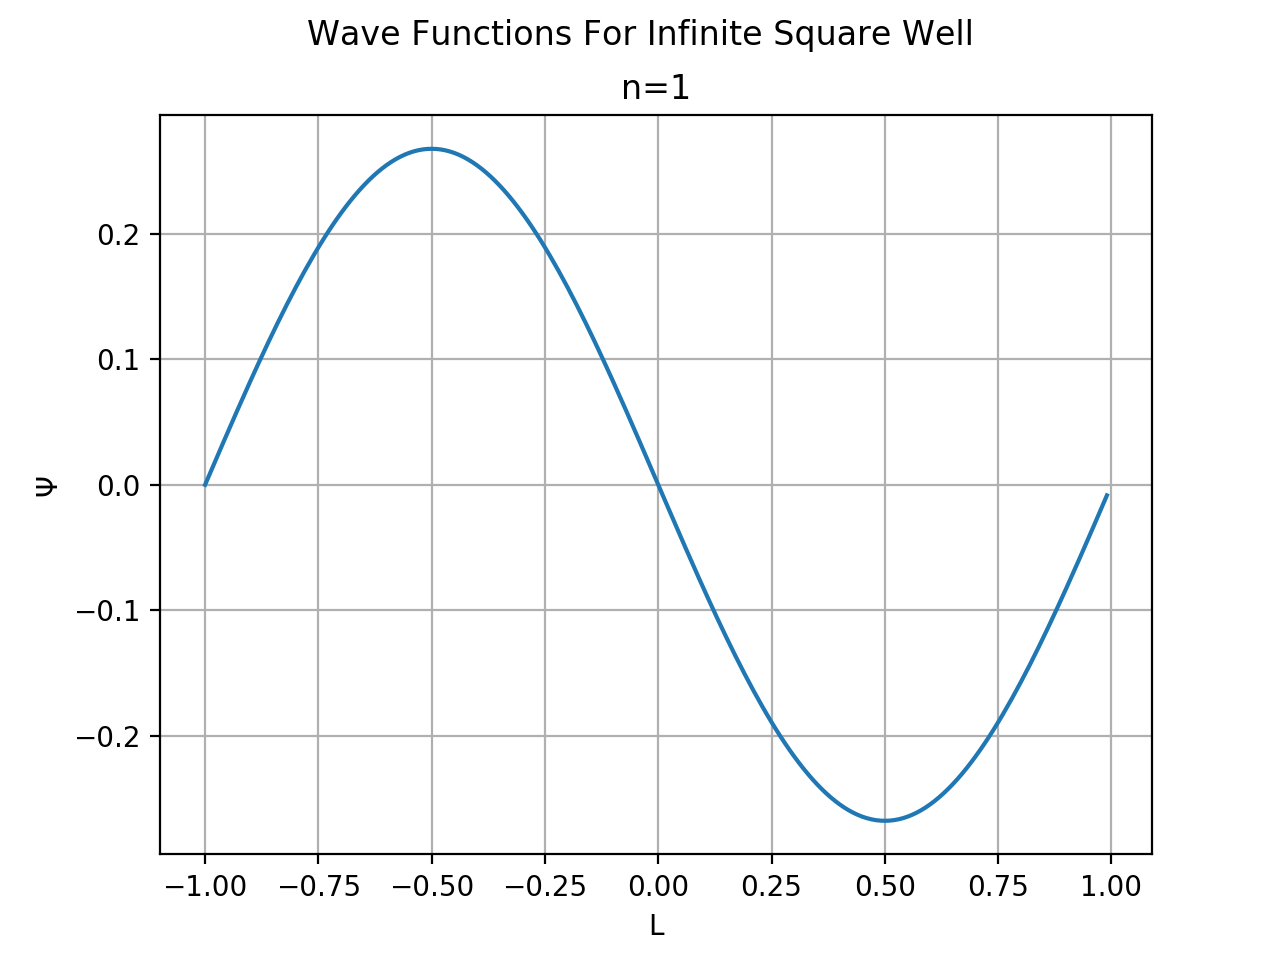

<IPython.core.display.Javascript object>


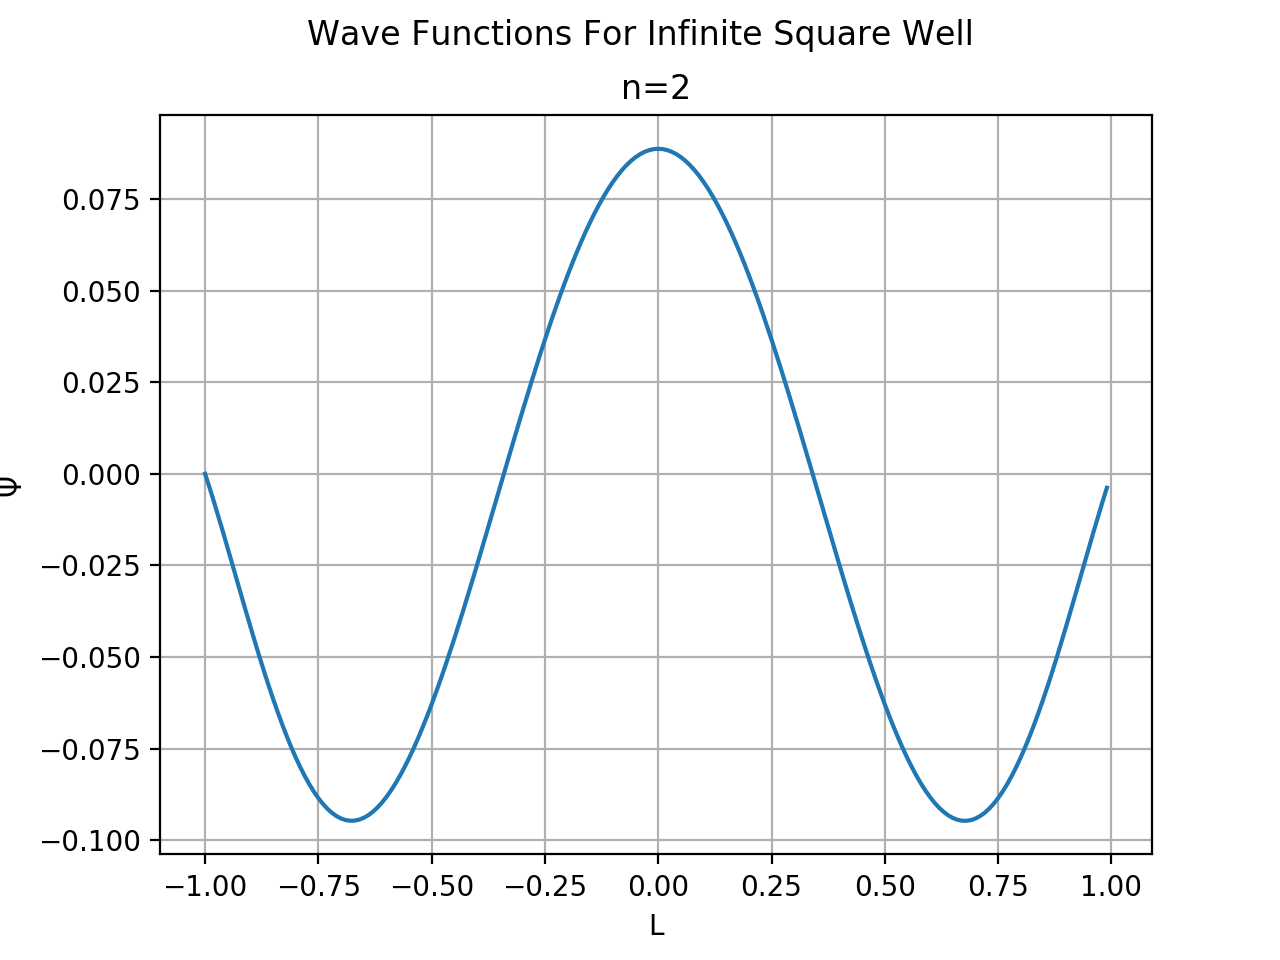

<IPython.core.display.Javascript object>


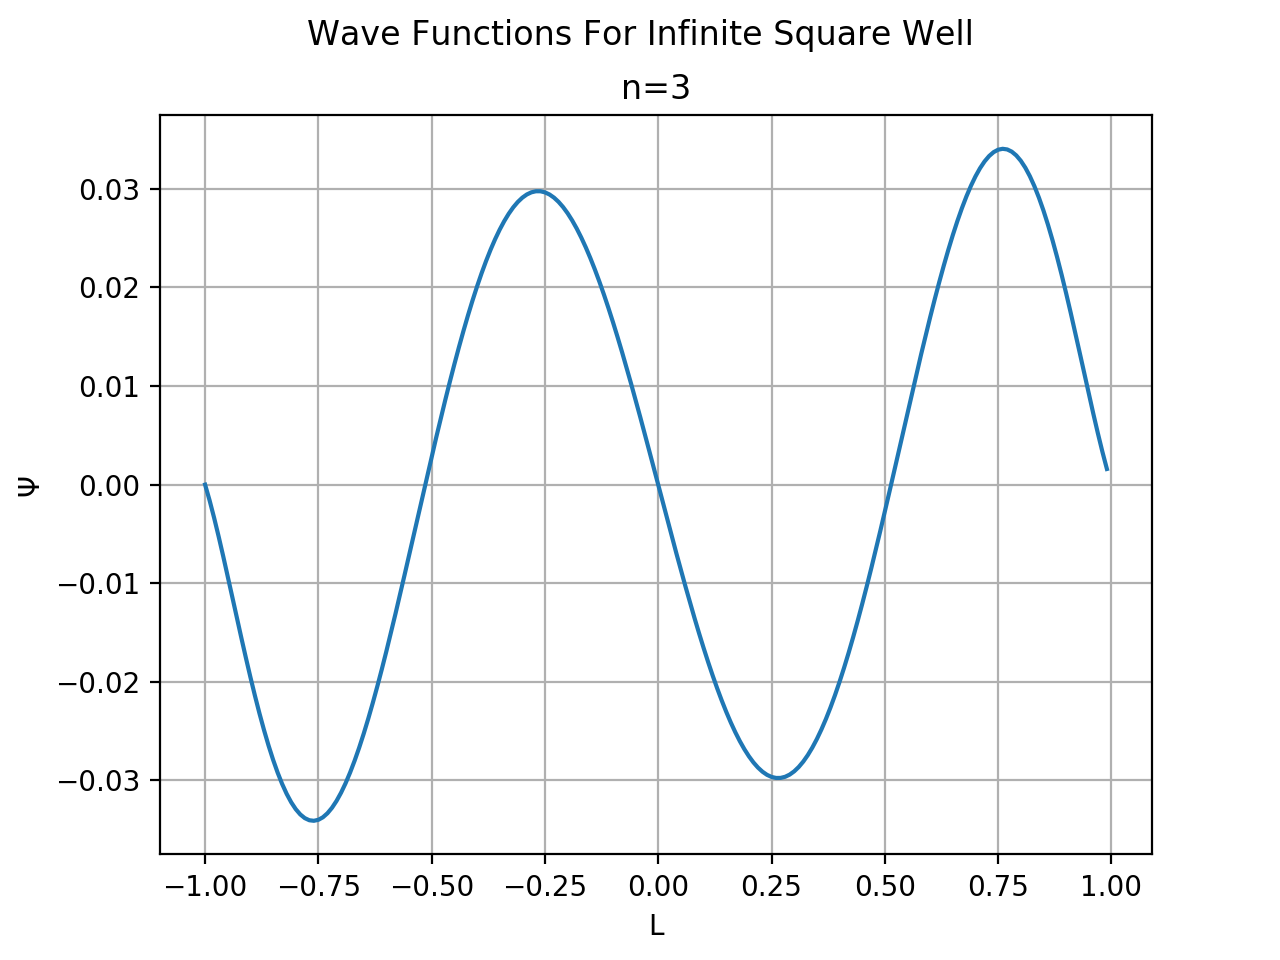

<IPython.core.display.Javascript object>


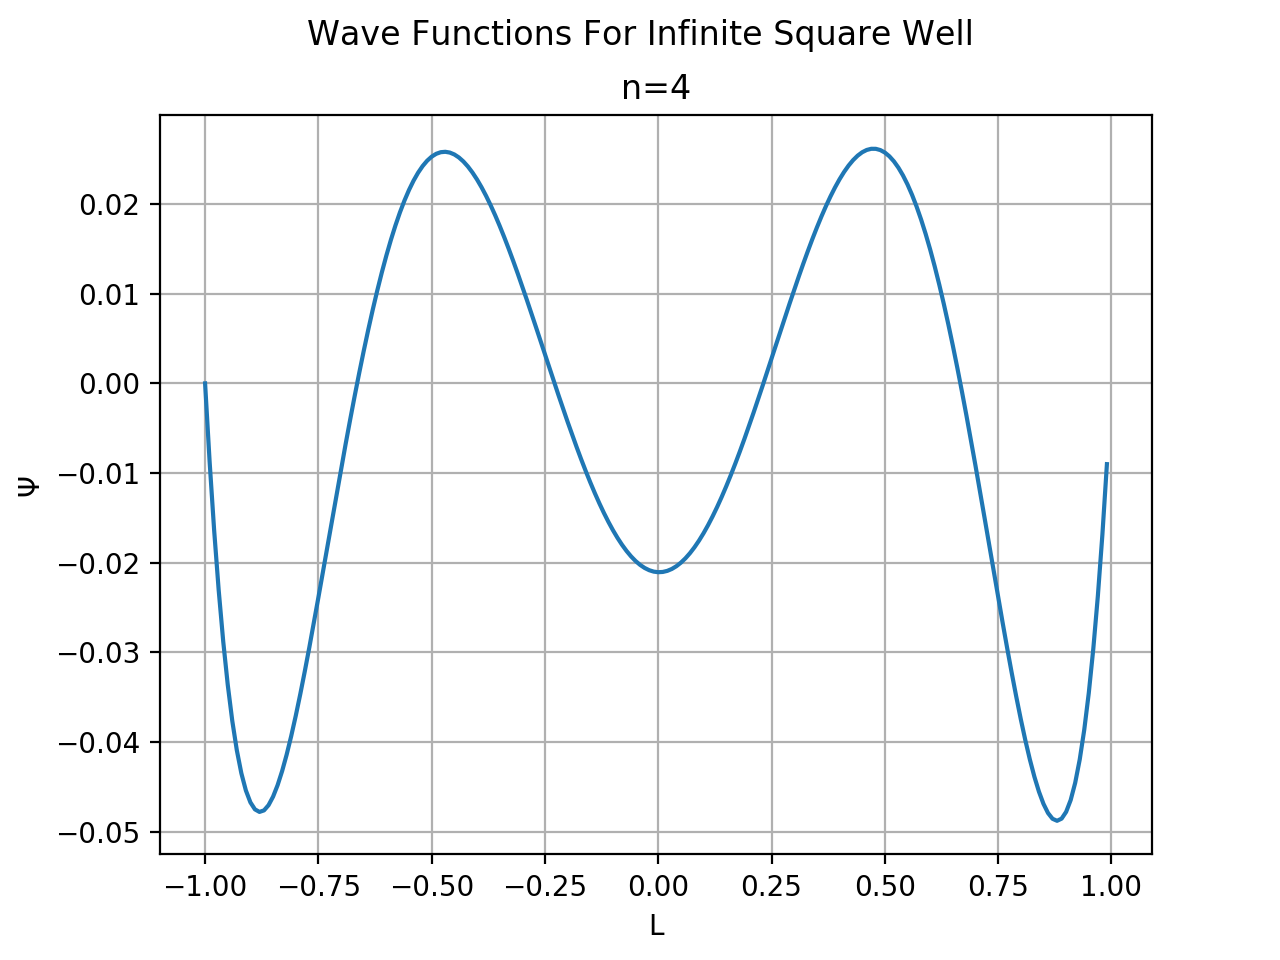

In [899]:
x = np.arange(-1,1,10e-3)

for i in range(5):                              # for loop looping over each value for phi in the function energy_state
    energy_state(phi, i)
    plt.title("n="+str(i))

In [901]:
x = np.linspace(-1,1,int(10e3))             # linear space from -1 to 1 with intervals of 10^3

#n = 6                                       # basis function of 6

phi_fn = []                                 # creates list for the phi functions

for i in range(n):
    phi = (x**i)*(x-1)*(x+1)                # function for each value of phi
    phi_fn.append(phi)                      # appends all values of phi to the list phi_fn above

In [902]:
def eigen_states(basis_functions):
    """defines a function eigen_states with 1 arguments; basis_functions"""
    
    n = len(basis_functions)   # takes n to be the length of numbers in basis_functions
    
    S = np.zeros((n,n))        # forms a zero matrix of dimensions n x n labelled S
    H = np.zeros((n,n))        # forms a zero matrix of dimensions n x n labelled H
    
    for i in range(n):
        for j in range(n):
            S_integral = np.trapz(np.conjugate(basis_functions[i])*basis_functions[j])    # calculates integral for the S matrix using the trapezoid method
            S[i,j] = S_integral

            diff2 = np.gradient(np.gradient(basis_functions[j]))

            H_integral = np.trapz(np.conjugate(basis_functions[i])*diff2)                 # calculates integral for the Hamiltonian matrix using the trapezoid method
            H[i,j] = H_integral

    eigenvalues, eigenvectors = eig(H,S)      # calculates eigenvalues and eigenvectors of the integrals H and S
    
    idx = abs(eigenvalues).argsort()
    sorted_eigenvalues = eigenvalues[idx]            # sorts eigenvalues
    sorted_eigenvectors = eigenvectors[:,idx]        # sorts eigenvectors

    return(sorted_eigenvectors)


In [903]:
def energy_state(Energy):
    """defines a function eigen_state with 1 arguments; Energy"""    
    y = np.zeros(len(x))        # creates a matrix of zeros of length 'x'
    
    for i in range(n):

        y = np.add(y,sorted_eigenvectors[Energy])         # adds a factor of sorted_eigenvectors[Energy] to y every iteration through the loop

        
    plt.plot(x,y,label= 'Energy={}'.format(eigenvalues[Energy]))
    plt.title('Energy Levels of Quantum State')
    plt.grid()
    plt.legend()

<IPython.core.display.Javascript object>


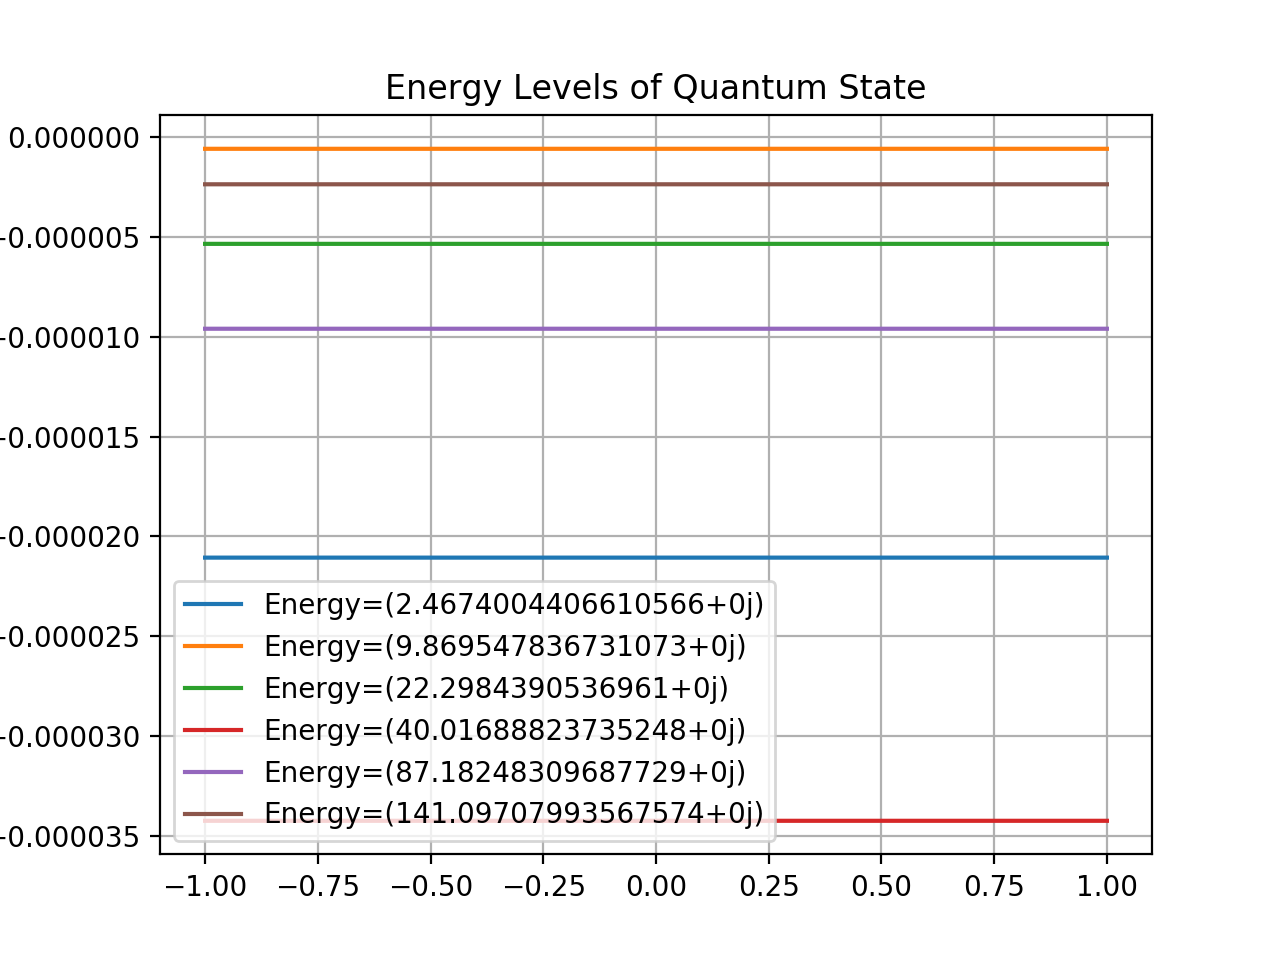

/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [904]:
%matplotlib notebook

plt.figure()

for i in range(n):
    energy_state(i)
    plt.plot()
    plt.legend()

    

    
plt.grid()


## Method

### Graphing and Finding Solutions to the Infinite Square Well

Firstly the phi function is given as $(x^{i})(x-1)(x+1)$,  where ‘i’ represents the basis function number 'N'. Using the inbuilt Symbol function from sympy 'x' is made a symbol so that phi can be differentiated with respect to x later on. Using another inbuilt function called diff(), the first and second derivatives of the phi function can be calculated. The second differential of the phi function is used later in the script when defining the Hamiltonian matrix and the double differential taken when the Hamiltonian operator acts on the values of phi. 

A function called basis_fn with 3 arguments is defined with 3 arguments; x1, x2 and dx, where the arguments represent an 'x' range starting from x1 and finish at x2 with an interval of dx. A for loop is then created to calculate the values of the phi function and the values of the double differential of the phi function through a basis function of 0 to 6 (which is the basis size used for this particular investigation). These values for the phi function and the double differential of the phi functions are appended to a list defined above and returned for the basis_fn function. 

A function called S_matrix is defined with 1 argument; basis_fn. The S matrix used in the matrix equation shown above is first set to a zero matrix with dimensions n x n. To calculate the integral that gives the S matrix (integral 2 [3]) the trapezoid method is used to integrate the complex conjugate of the phi functions multiplied by the phi functions over a range of + infinity to - infinity. The trapezoid method works by drawing rectangles underneath the plot, each with a width 'dx' and adding up the area of each rectangle to calculate the area underneath the graph. The S matrix with these new values for the S matrix are then added to the i and j colums of the n x n zeros matrix the S matrix was originally set to at the beginning of this function and the S matrix is then returned at the end of the function. The S_matrix function is then called for all values of the phi function using the basis size 0 to 6 and labelled the S_phi matrix.

A function called the H_matrix is defined with 2 arguments; basis_fn and differentials_2. The Hamiltonian matrix used in the matrix equation shown above is set to a zero matrix with dimensions n x n and called H_phi. To calculate the integral that gives the H matrix (integral 1 [2]) the trapezoid method is used to integrate the complex conjugate of the phi functions multiplied by the phi functions with the Hamiltonian operator acting on the phi functions, over a range of + infinity to - infinity. The Hamiltonian operator acts by operating a double differential calculation on the phi functions, which was calculated at the beginning of this script and appended to a list called phi_differentials_2. The Hamiltonian matrix with these new values for the H_phi matrix are then added to the i and j colums of the n x n zeros matrix the H_phi matrix was originally set to at the beginning of this function and the H_phi matrix is then returned at the end of the function. The H_matrix function is then called for all values of the phi function and the values of the double differentials of the phi functions using the basis size 0 to 6 and relabelled the H_phi matrix.

Using both the H_phi matrix and S_phi matrix just calculated, the eigenvalues and eigenvectors of both matrices are then calculated using the inbuilt eig function from scipy.linalg. Then using the inbuilt function argsort(), the eigenvalues can be ordered from smallest to largest starting at an energy level of 0 to an energy level of 5. The eigenvalues and eigenvectors calculated just above are then sorted so that the eigenvalues are represented by the i column of sorted values and the eigenvectors are represented by the j column of the sorted values. Both the sorted eigenvalues and eigenvectors are then put into arrays.

A function called energy_state is defined with 2 arguments; basis_fn and Energy_level. 'y' is a zero matrix that is formed with dimensions of size length of 'x'. A for loop is made to add a value of eigenvectors[i,Energy_level]* basis_fn[i] to y after every iteration through the loop. A plot of 'x' against 'y' is then made to present the wave functions for the infinite square well. x is defined as a range between -1 and 1 with an interval of 10e-3. A for loop is made to loop through a range of 0 to 5 and iterate through this range when the energy_state function is called for each value of phi. This plots graphs of each wave function for the infinite square well in a basis function of 0 to 6.

### Graphing the Enegry Levels

A for loop is written to loop over a range 'n' (which is the basis set size used for this investigation) to append the values of phi when iterating through the phi function to a list names phi_fn created above. 

A function called eigen_states is defined with 1 argument; basis_functions. The basis set size N is set to the length of the argument Basis_functions. 2 zero matrices are created called S and H, both of which have dimensions n x n. Similarly to earlier in the S_matrix function and H_matrix the integrals for the Hamiltonian matrix and the S matrix are calculated using the trapezoid method. The second differential is calculated of the j column of basis_functions. The H integral is calculated by using the trapezoid method on the complex conjugate of the i clumn of basis_functions multiplied by the second differential of the j column of basis_functions calculated above. The integrated values calculated in this loop are then added to the i and j columns of both zero matrices S and H. Using these 2 new H and S matrices, the eigenvalues and eigenvectors are calculated. Then using the inbuilt function argsort(), the eigenvalues can be ordered from smallest to largest starting at an energy level of 0 to an energy level of 5. The eigenvalues and eigenvectors calculated just above are then sorted so that the eigenvalues are represented by the i column of sorted values and the eigenvectors are represented by the j column of the sorted values. Finally the sorted eigenvectors are returned at the end of this function.

A function called energy_state is defined with 1 argument; Energy. 'y' is a zero matrix that is formed with dimensions of size length of 'x'.  A for loop is made to add a value of sorted_eigenvectors[Energy] to y after every iteration through the loop. A plot of 'x' against 'y' is then made to present the energy levels for each wave function in the infinite square well. A for loop is made to loop through a range of 0 to n and iterate through this range when the energy_state function is called for each iteration. This plots graphs of each energy level for each wave function represented in the infinite square well.

## Results and Discussion

#### The solutions found when calculating the eigenvalues of the Hamiltonian matrix and the S matrix were the following:

Energy when n=0: 2.46740044 eV

Energy when n=1: 9.86954784 eV

Energy when n=2: 22.29843905 eV

Energy when n=3: 40.01688824 eV

Energy when n=4: 87.1824831 eV

Energy when n=5: 141.09707994 eV



#### Known solutions to the energies for the infinite square well [3]:

Energy when n=0: 2.47 eV

Energy when n=1: 9.87 eV

Energy when n=2: 22.2 eV

Energy when n=3: 39.5 eV

Energy when n=4: 61.7 eV

Energy when n=5: 88.8 eV

For the first 3 energy levels of this quantum state, if the solutions calculated in this investigation were rounded to 3 significant figures they are the same as the known solutions learnt in studies done in quantum mechanics. There is a percentage difference between the value solved using the code above and the known answer of less than 0.5% in each case. This is an extremely small percentage difference, therefore these 3 results can be trusted as reliable and therefore accurate solutions for the energies in the infinite square well. For the energy level n=3, the solution calculated is 40.01688824 eV and the known solution is 39.5 eV with a percentage difference of 1.3%. This is a very small percentage difference between the two solutions meaning the result solved through code is still very reliable. As the energy levels increase through the infinite square well the solutions calculated through the code above differ more and more from the known solutions learnt from quantum mechanics. For the energy level n=4 the solution calculated is 87.1824831 eV, whereas the known solution is 61.7 eV, and a percentage difference of 34.2%. This percentage difference is very high and exceeds a percentage difference of 10%-15%, therefore can no longer be taken as a reliable result. Furthermore, for the energy level n=5, the solution calculated is 141.09707994 eV, whereas the known solution is 88.8 eV with a percentage difference between the two solutions of 45.5%. This percentage difference exceeds 10%-15% and is extremely high therefore this result cannot be trusted as a reliable result. The reason the eigenvalues get more and more inaccurate for the higher energy levels could be as a result of there being more electron interactions at the higher energy levels. Due to there being more electrons at the higher energy levels, there will be a more varied frequency of interactions and the energy at which they interact. This unreliability when predicting interactions can lead to inaccuracies when calculating the eigenvalues and solving Schrödinger's Equation at higher and higher energy levels.



The plot graphing the wave functions for the infinite square well successfully represents the behaviour of the wave functions at each energy level from the first energy level to the fourth energy level. Each wave function shows a turning point at x=0 and $E_{k}$=0, (where E=V= $1/2$$mw^{2}_{o}$$x^{2}_{T}$ at classical turning points [2]). Each graph plotted shows the correct number of turning points and nodes.

The 'Energy Levels' graph plotted the energy levels in an infinite square well successfully. This can be seen as each energy level is not evenly spaced apart (which would be seen if the quantum system being investigated was a quantum harmonic oscilator for example) and are sparated from the exponentially expected value in a hydrogen atom (which is -13.6eV [2]) by a factor of the exponentially expected value in a hydrogen atom over $n^{2}$, where n is the energy level of the quantum state:

$E_{n}$ = $E_{1}$/$n^{2}$   [2]

Additionally, each energy level on the graph correctly corresponds to the correct solution for the wavefunction at that level in the infinite square well.




## Conclusion

In conclusion this investigation into exploring Schrödinger Equation in Marix Form and finding the solutions the infinite square well as the chosen quantum system has been shown to reproduce the correct graphs when plotting the energy levels of the quantum states and the wave functions at each energy level in the infinite square well. The code has correctly solved the Schrödinger's Equation to give the eigenvalues of the first 3 energy levels correctly, but get progressivley less accurate and therefore less reliable as you go higher up the energy levels. 

Strengths of the code used includes the high precision at which the eigenvalues and eigenvectors were calculated to. Additionally, the graphs plotted for the energy levels of a quantum state and the wave functions for the infinite square well were drawn accuratley when compared to models in quantum mechanics. Weaknesses in the code include the unreliability of the eigenvalues calculated as they reach higher and higher energy levels. 

If this investigation was to be conducted in the future an alternative method to calculate the integral is by using the simpsons method instead of the trapezoid method. This method invoolves finding the midpoint between the two ends of a plot on a graph and drawing a parabola between the two ends and  having the midpoint as the centre of the parabola. Similarly to the trapezoid method, many sections can be taken underneath the plot, each with a width of 'dx' and added together to get a more accurate answer for the total area under the graph. Other graphing utilities for python can also be used to draw more precise graphs for the energy levels and the wave functions in an infinite square well. Additionally, this code can be modified and used to apply to different quantum systems and solve Schrödinger's Equation for these other quantum systems (for example the finite square well or the quantum harmoni oscillator). 

## References

[1]: Qmplus.qmul.ac.uk. (2019). SPA5666A – 2018/19. [online] Available at: https://qmplus.qmul.ac.uk/pluginfile.php/1501597/mod_resource/content/0/project_list.pdf [Accessed 6 Jan. 2019].


[2]:Qmplus.qmul.ac.uk. (2019). [online] Available at: https://qmplus.qmul.ac.uk/pluginfile.php/845238/mod_resource/content/1/Hydrogen%20atom.pdf [Accessed 6 Jan. 2019].

[3]:Hyperphysics.phy-astr.gsu.edu. (2019). Schrodinger equation. [online] Available at: http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/pbox.html [Accessed 6 Jan. 2019].
        
        
        
        
        

    